In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing as ppr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn import metrics
get_ipython().run_line_magic('matplotlib', 'inline')

######-------------------------------  Import the data and preprocess --------------------------#########

In [2]:
Insurance = pd.read_csv("insurance_part2_data.csv",sep=',')

In [3]:
Insurance.dtypes
#Insurance.head()
#Insurance.shape

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [4]:
Insurance['Agency_Code'] = Insurance['Agency_Code'].astype('category')
Insurance['Type'] = Insurance['Type'].astype('category')
Insurance['Claimed'] = Insurance['Claimed'].astype('category')
Insurance['Channel'] = Insurance['Channel'].astype('category')
Insurance['Product Name'] = Insurance['Product Name'].astype('category')
Insurance['Destination'] = Insurance['Destination'].astype('category')

### ----- Exploratory Data Analysis --------------------------------------####

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Agency_Code vs Claims'}, xlabel='Agency_Code', ylabel='count'>

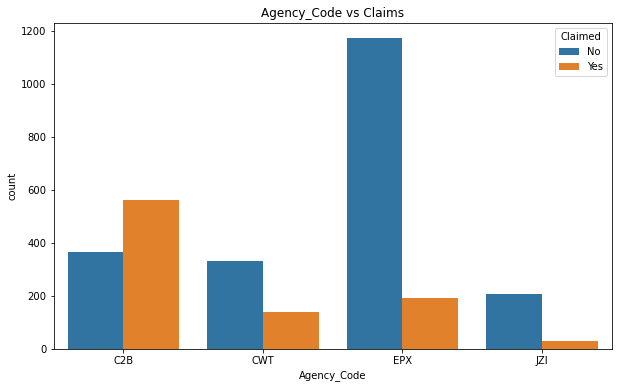

In [5]:
plt.figure(figsize =(10, 6)) 
plt.title('Agency_Code vs Claims')
sns.countplot(Insurance['Agency_Code'],hue=Insurance['Claimed'],orient="h")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Product Name vs Claims'}, xlabel='Product Name', ylabel='count'>

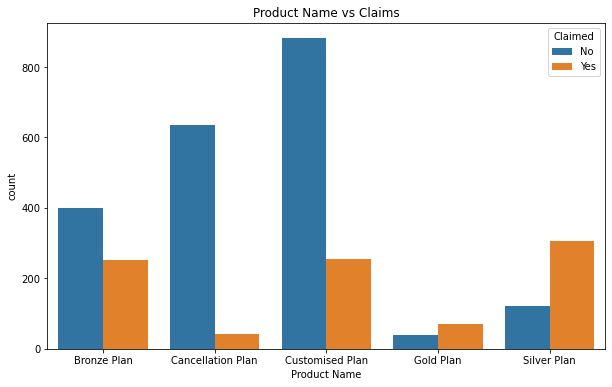

In [6]:
plt.figure(figsize =(10, 6)) 
plt.title('Product Name vs Claims')
sns.countplot(Insurance['Product Name'],hue=Insurance['Claimed'],orient="h")

(array([ 86., 187., 204., 430., 276., 315., 172., 196.,  89., 105.,  62.,
         88.,  91.,  53.,  85.,  35.,  27.,  27.,  23.,  11.,  58.,   2.,
          3.,  13.,   0.,   9.,   3.,   7.,   9.,  17.,  11.,   7.,   5.,
         13.,  28.,  11.,   5.,  11.,  15.,   0.,  59.,   0.,   7.,   1.,
          5.,   0.,  60.,  10.,  10.,   1.,   2.,   1.,   4.,   1.,  10.,
          4.,   1.,   0.,   0.,   2.,   5.,  10.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   8.,   0.,   2.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   5.39,  10.78,  16.17,  21.56,  26.95,  32.34,  37.73,
         43.12,  48.51,  53.9 ,  59.29,  64.68,  70.07,  75.46,  80.85,
         86.24,  91.63,  97.02, 102.41, 107.8 , 113.19, 118.58, 123.97,
        129.36, 134.75, 140.14, 145.53, 150.92, 156.31, 161.7 , 167.09,
        172.48, 177.87, 183.26

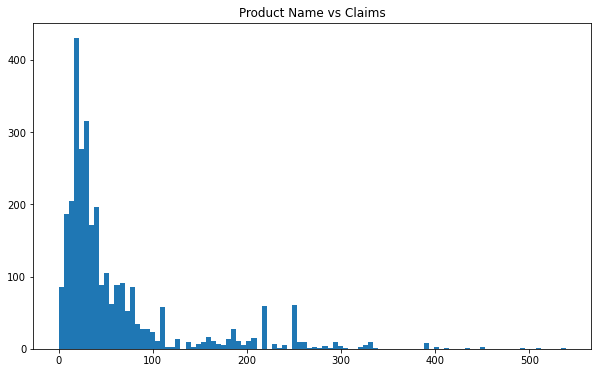

In [7]:
plt.figure(figsize =(10, 6)) 
plt.title('Product Name vs Claims')
plt.hist(Insurance['Sales'],bins=100)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Type of tour insurance firms vs Claims'}, xlabel='Type', ylabel='count'>

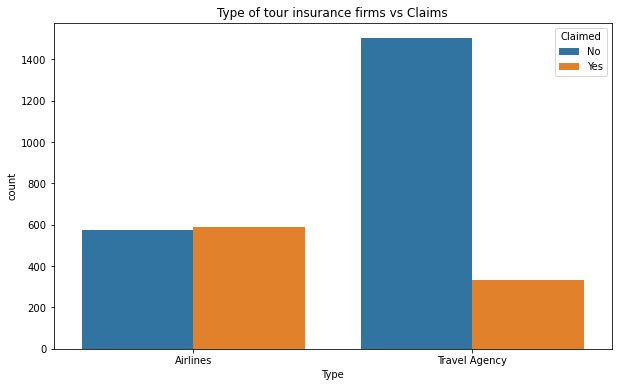

In [8]:
plt.figure(figsize =(10, 6)) 
plt.title('Type of tour insurance firms vs Claims')
sns.countplot(Insurance['Type'],hue=Insurance['Claimed'],orient="h")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Destination vs Claims'}, xlabel='Destination', ylabel='count'>

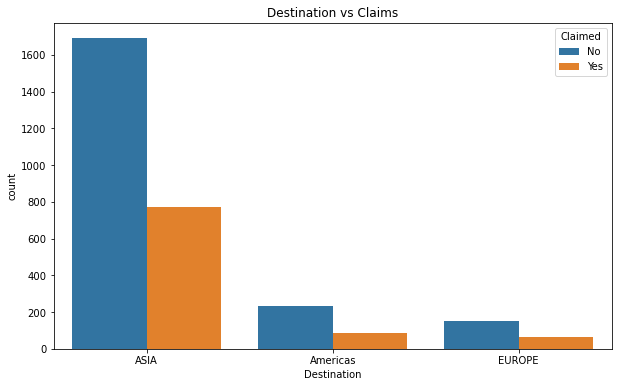

In [9]:
plt.figure(figsize =(10, 6)) 
plt.title('Destination vs Claims')
sns.countplot(Insurance['Destination'],hue=Insurance['Claimed'],orient="h")

#----------- Outlier Treatment ------------------------########

<AxesSubplot:>

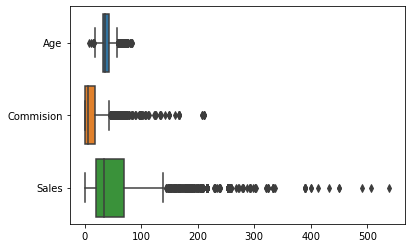

In [11]:
sns.boxplot(data=Insurance.loc[:,Insurance.columns!='Duration'],orient="h")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

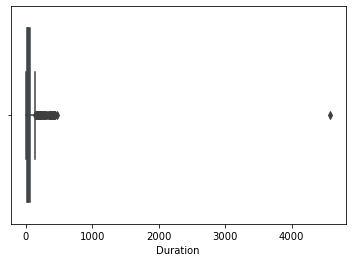

In [12]:
sns.boxplot(Insurance['Duration'])

In [13]:
Insurance['Duration'].max()
Insurance['Duration'].min()
Insurance = Insurance.drop(Insurance['Duration'].idxmax())
Insurance = Insurance.drop(Insurance['Duration'].idxmin())
Insurance = Insurance.drop(Insurance['Commision'].idxmax())

Insurance = Insurance.drop('Channel',1)

Insurance.head()
Insurance.shape

(2997, 9)

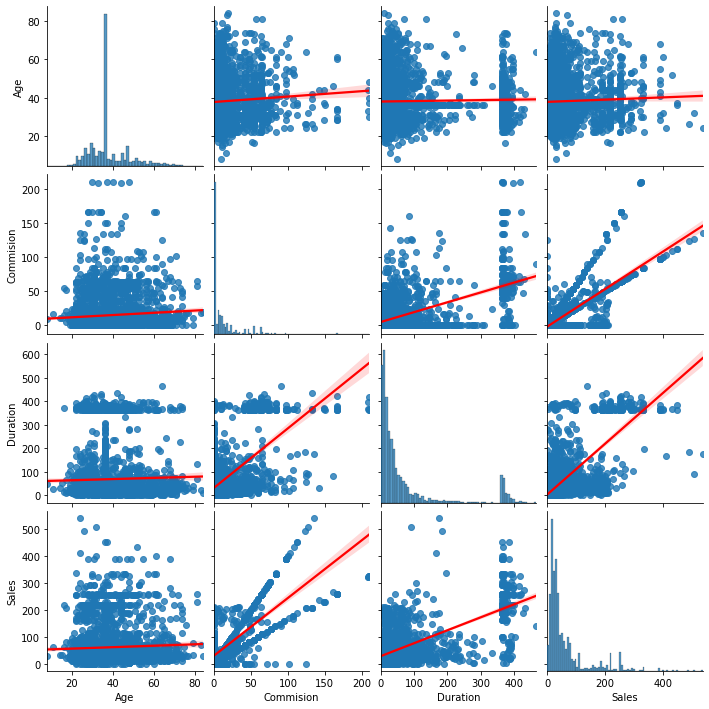

In [14]:
sns.pairplot(Insurance,kind='reg',plot_kws={'line_kws':{'color':'red'}})

####--------------- Splitting to training and Testing data ------------------#####

In [15]:
X = Insurance.drop('Claimed',axis=1)
Y = Insurance.Claimed

In [16]:
X_Train , x_test , y_Train , y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [17]:
X_Train.head()

,Age,Agency_Code,Type,Commision,Duration,Sales,Product Name,Destination
859,36,EPX,Travel Agency,0.00,2,20.0,Customised Plan,ASIA
1011,36,EPX,Travel Agency,0.00,216,20.0,Customised Plan,EUROPE
48,52,JZI,Airlines,11.55,90,33.0,Bronze Plan,ASIA
720,61,JZI,Airlines,7.70,101,22.0,Bronze Plan,ASIA
2480,33,JZI,Airlines,24.00,2,18.0,Bronze Plan,ASIA


In [18]:
lenc = LabelEncoder()
X_Train = X_Train.apply(lenc.fit_transform)
x_test = x_test.apply(lenc.fit_transform)

In [19]:
RFX_Train = pd.get_dummies(X_Train)
RFX_Train.head()
RFx_test = pd.get_dummies(x_test)

#######--########--- First Part : CART (Classification Decision TREE) ---------------#####

In [20]:
CART = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=3)

In [21]:
CARTModel = CART.fit(X=X_Train,y=y_Train)

In [22]:
path = CARTModel.cost_complexity_pruning_path(X_Train,y_Train)
ccp_alphas, impurities = path.ccp_alphas , path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

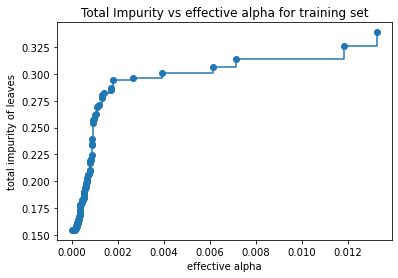

In [23]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

<AxesSubplot:>

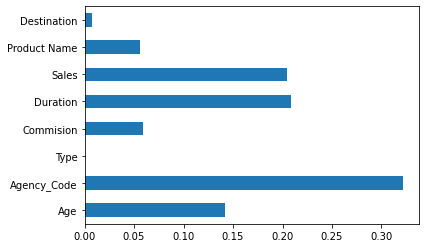

In [24]:
feat_imp = pd.Series(CARTModel.feature_importances_,index=X_Train.columns)
feat_imp.plot(kind='barh')

In [25]:
CART = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=3,ccp_alpha=0.004)
CARTModel = CART.fit(X=X_Train,y=y_Train)

[Text(148.8, 190.26, 'X[1] <= 0.5\ngini = 0.424\nsamples = 2097\nvalue = [1458, 639]'),
 Text(74.4, 135.9, 'X[5] <= 33.5\ngini = 0.475\nsamples = 650\nvalue = [252, 398]'),
 Text(37.2, 81.53999999999999, 'gini = 0.306\nsamples = 69\nvalue = [56, 13]'),
 Text(111.60000000000001, 81.53999999999999, 'X[4] <= 102.5\ngini = 0.447\nsamples = 581\nvalue = [196, 385]'),
 Text(74.4, 27.180000000000007, 'gini = 0.484\nsamples = 409\nvalue = [168, 241]'),
 Text(148.8, 27.180000000000007, 'gini = 0.273\nsamples = 172\nvalue = [28, 144]'),
 Text(223.20000000000002, 135.9, 'X[5] <= 87.0\ngini = 0.278\nsamples = 1447\nvalue = [1206, 241]'),
 Text(186.0, 81.53999999999999, 'gini = 0.158\nsamples = 830\nvalue = [758, 72]'),
 Text(260.40000000000003, 81.53999999999999, 'X[6] <= 2.5\ngini = 0.398\nsamples = 617\nvalue = [448, 169]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.372\nsamples = 578\nvalue = [435, 143]'),
 Text(297.6, 27.180000000000007, 'gini = 0.444\nsamples = 39\nvalue = [13, 

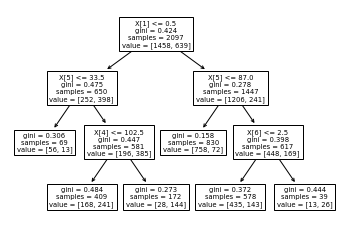

In [26]:
plot_tree(CARTModel)

In [27]:
## ------- Predict ----------####

y_predtest = CARTModel.predict(x_test)
y_probtest = CARTModel.predict_proba(x_test)

## -------- Model Validation ------------###

In [28]:
cf = metrics.confusion_matrix(y_test,y_predtest)
metrics.ConfusionMatrixDisplay(cf)

In [29]:
metrics.accuracy_score(y_test,y_predtest)

0.7633333333333333

In [30]:
y_predTrain = CARTModel.predict(X_Train)
y_probTrain = CARTModel.predict_proba(X_Train)
metrics.accuracy_score(y_Train,y_predTrain)

0.7916070577014783

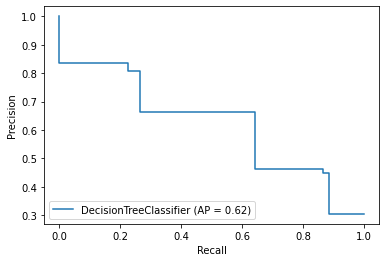

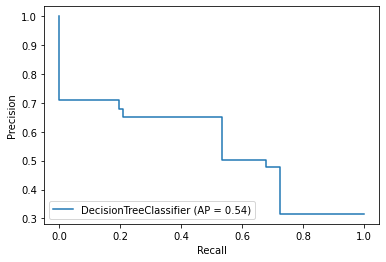

In [31]:
metrics.plot_precision_recall_curve(CARTModel,X_Train,y_Train)
metrics.plot_precision_recall_curve(CARTModel,x_test,y_test)

              precision    recall  f1-score   support

          No       0.80      0.87      0.83       616
         Yes       0.65      0.54      0.59       284

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.76       900



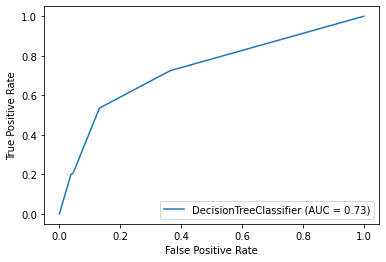

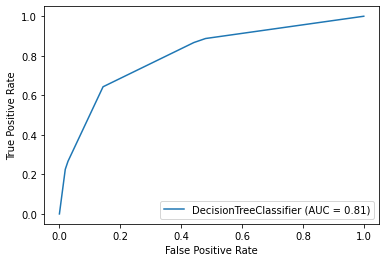

In [32]:
print(metrics.classification_report(y_test,y_predtest))
metrics.plot_roc_curve(CARTModel,x_test,y_test)
metrics.plot_roc_curve(CARTModel,X_Train,y_Train)

######-----########--------#### Second part : Random Forest (Classification Decision TREE) --------#######-----------#########

In [33]:
RF = RandomForestClassifier(n_estimators=501,oob_score=True,criterion="gini",min_samples_leaf=10,random_state=42,max_features=4)

In [34]:
RFModel = RF.fit(X=RFX_Train,y=y_Train)

RFModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 501,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

<AxesSubplot:>

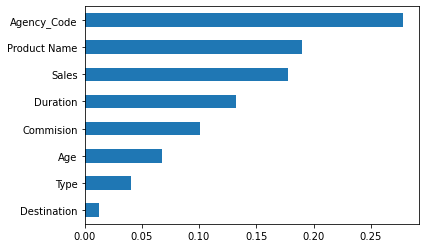

In [35]:
feat_imp = pd.Series(RFModel.feature_importances_,index=RFX_Train.columns)
feat_imp = feat_imp.sort_values()
feat_imp.plot(kind='barh')

In [42]:
ensemble_clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,criterion="gini",min_samples_leaf=10,random_state=42))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 10
max_estimators = 500

E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs d

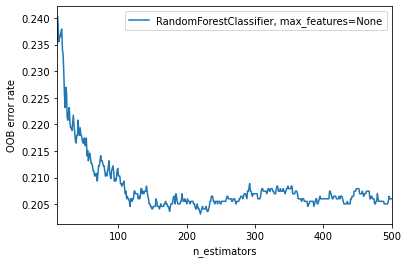

In [43]:
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X=RFX_Train,y=y_Train)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [44]:
#-------------- Predict--------------####

y_predtest = RFModel.predict(RFx_test)
y_probtest = RFModel.predict_proba(RFx_test)

In [45]:
cf = metrics.confusion_matrix(y_test,y_predtest)
cf

array([[544,  72],
       [137, 147]], dtype=int64)

In [46]:
metrics.accuracy_score(y_test,y_predtest)

0.7677777777777778

In [47]:
y_predTrain = RFModel.predict(RFX_Train)
y_probTrain = RFModel.predict_proba(RFX_Train)

In [48]:
metrics.accuracy_score(y_Train,y_predTrain)

0.8254649499284692

#-----------Model Validation ---------------####

              precision    recall  f1-score   support

          No       0.80      0.88      0.84       616
         Yes       0.67      0.52      0.58       284

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



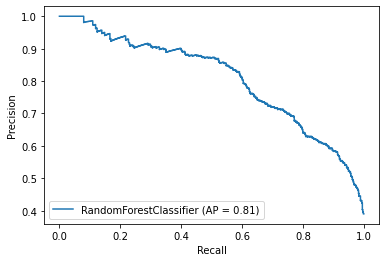

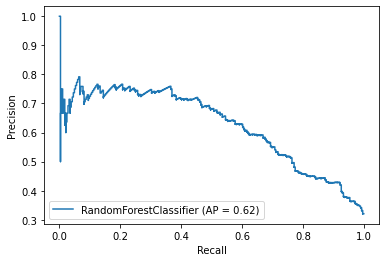

In [49]:
metrics.plot_precision_recall_curve(RFModel,RFX_Train,y_Train)
metrics.plot_precision_recall_curve(RFModel,RFx_test,y_test)

print(metrics.classification_report(y_test,y_predtest))

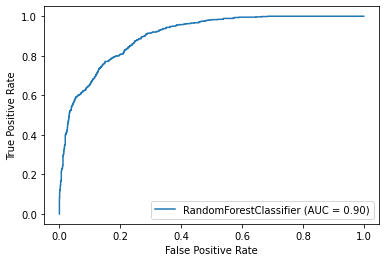

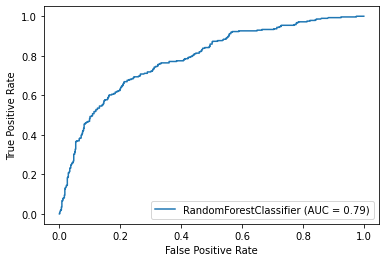

In [50]:
metrics.plot_roc_curve(RFModel,RFX_Train,y_Train)
metrics.plot_roc_curve(RFModel,RFx_test,y_test)

####-----######------------- THIRD PART : Artificial Nueral Network ANN ----------------#######

In [51]:
## One Hot encoding and scaling

ANNY_Train = pd.get_dummies(y_Train)
ANNY_Train = pd.DataFrame(ANNY_Train)

ANNy_test = pd.get_dummies(y_test)
ANNy_test = pd.DataFrame(ANNy_test)

In [52]:
scaler = StandardScaler()

ANNX_Train = scaler.fit_transform(RFX_Train)
ANNX_Train = pd.DataFrame(ANNX_Train,columns=RFX_Train.columns)

In [53]:
ANNx_test = scaler.fit_transform(RFx_test)
ANNx_test = pd.DataFrame(ANNx_test,columns=RFx_test.columns)

In [54]:
#annclf = MLPClassifier(,max_iter=150000,random_state=1,verbose=10,alpha=0.0001,tol=0.00001)
annclf = MLPClassifier(max_iter=150000,random_state=1)

#####  Using gridcv to find best hyperparameters for the nueral network   ####

In [55]:
parameter_space ={'hidden_layer_sizes':[(9,4),(9,3),(9,2),(8,4),(8,3),(8,2),(7,3),(7,2),(6,3),(6,2),(5,2),(4,2)],
                 'activation':['relu','logistic','tanh'],
                 'solver': ['sgd' , 'adam'],
                 'alpha' : [0.0001 , 0.05],
                 'learning_rate' : ['constant','adaptive']}

In [56]:
clf = GridSearchCV(annclf,parameter_space,n_jobs=-1,cv=10)
clf.fit(ANNX_Train,ANNY_Train['Yes'])

KeyboardInterrupt: 

In [57]:
print('Best parameters found for ANN : \n', clf.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Running the nueral network with activation : Relu , alpha " 0.0001 , hidden layers (9,4), solver : adam and learning_rate constant

In [58]:
annclfinal = MLPClassifier(hidden_layer_sizes= (9,4), activation= 'relu',solver='adam',
                           alpha = 0.0001,learning_rate= 'constant', max_iter=150000,random_state=1,verbose=10,shuffle=True,tol=0.000001)

In [61]:
annmodel = annclfinal.fit(ANNX_Train,ANNY_Train['Yes'])

Iteration 1, loss = 0.67972655
Iteration 2, loss = 0.65038774
Iteration 3, loss = 0.62620428
Iteration 4, loss = 0.60682500
Iteration 5, loss = 0.59015503
Iteration 6, loss = 0.57538827
Iteration 7, loss = 0.56220179
Iteration 8, loss = 0.55068777
Iteration 9, loss = 0.54028024
Iteration 10, loss = 0.53171360
Iteration 11, loss = 0.52375195
Iteration 12, loss = 0.51711250
Iteration 13, loss = 0.51125315
Iteration 14, loss = 0.50614828
Iteration 15, loss = 0.50193592
Iteration 16, loss = 0.49831766
Iteration 17, loss = 0.49532211
Iteration 18, loss = 0.49269629
Iteration 19, loss = 0.49053353
Iteration 20, loss = 0.48858626
Iteration 21, loss = 0.48685342
Iteration 22, loss = 0.48542904
Iteration 23, loss = 0.48368448
Iteration 24, loss = 0.48231102
Iteration 25, loss = 0.48094131
Iteration 26, loss = 0.47976881
Iteration 27, loss = 0.47868222
Iteration 28, loss = 0.47760883
Iteration 29, loss = 0.47660334
Iteration 30, loss = 0.47565871
Iteration 31, loss = 0.47470878
Iteration 32, los

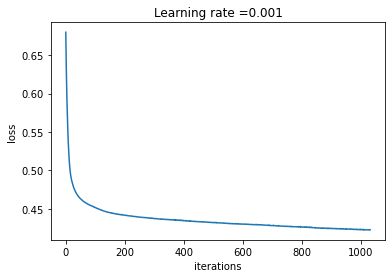

In [62]:
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(annmodel.loss_curve_)
plt.show()

In [64]:
y_predtestann = annmodel.predict(ANNx_test)
y_probtestann = annmodel.predict_proba(ANNx_test)

In [65]:
cf = metrics.confusion_matrix(ANNy_test['Yes'],y_predtestann)

metrics.accuracy_score(ANNy_test['Yes'],y_predtestann)

0.7755555555555556

In [66]:
y_predTrainann = annmodel.predict(ANNX_Train)
y_probTrainann = annmodel.predict_proba(ANNX_Train)
metrics.accuracy_score(ANNY_Train['Yes'],y_predTrainann)

0.8106819265617549

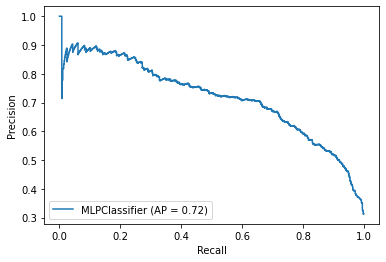

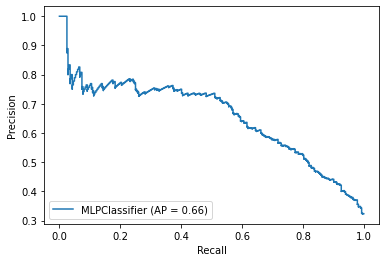

In [67]:
## Model Valdiation --####

metrics.plot_precision_recall_curve(annmodel,ANNX_Train,ANNY_Train['Yes'])
metrics.plot_precision_recall_curve(annmodel,ANNx_test,ANNy_test['Yes'])

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       616
           1       0.66      0.59      0.62       284

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



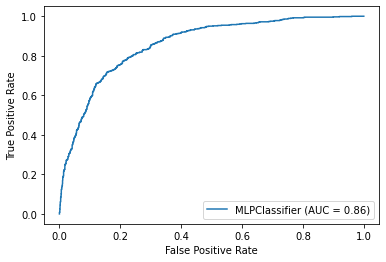

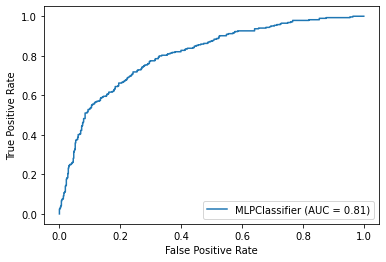

In [68]:
print(metrics.classification_report(ANNy_test['Yes'],y_predtestann))
metrics.plot_roc_curve(annmodel,ANNX_Train,ANNY_Train['Yes'])
metrics.plot_roc_curve(annmodel,ANNx_test,ANNy_test['Yes'])